# Lab 8  356

## Agglomerative clustering in Python

```linkage()``` performs agglomerative clustering. The most important parameters are ```method``` and ```metric```. The method parameter specifies the measure of similarity, such as single, complete, and centroid. The metric parameter specifies the kind of distance between instances, such as Euclidean distance. The rest of the parameters and matching values can be found in scipy documentation for hierarchical clustering.

The dendrogram function plots a dendrogram given a dataframe. The scipy documentation for dendrograms lists the parameters and corresponding values. https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Sometimes, a more convenient way of structuring the data for clustering is by using a distance matrix. The agglomerative clustering model can take in a distance matrix as input by using the squareform function from the spatial.distance package.

Researchers studying chemical properties of wines collected data on a sample of white wines in Northern Portugal. A research goal was to cluster wines based on similar chemical properties.

Cluster wines with single linkage.
The code provided creates a dataframe with two features (residual_sugar and fixed_acidity), normalizes the dataframe, creates a distance matrix, and displays the cluster membership of each data point.

In [1]:
import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive #mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
wine = pd.read_csv('/content/drive/MyDrive/CS 356/wine1.csv')
wine.head()

,residual_sugar,fixed_acidity,chlorides,density,free_sulfur_dioxide
0,12.20,7.4,0.050,0.99730,57.0
1,13.90,7.7,0.050,0.99855,44.0
2,1.60,6.4,0.092,0.99280,40.0
3,1.45,8.1,0.033,0.99080,11.0
4,16.20,8.5,0.074,0.99800,41.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   residual_sugar       27 non-null     float64
 1   fixed_acidity        27 non-null     float64
 2   chlorides            27 non-null     float64
 3   density              27 non-null     float64
 4   free_sulfur_dioxide  27 non-null     float64
dtypes: float64(5)
memory usage: 1.2 KB


In [5]:
# Calculate a distance matrix with selected variables
X = wine[['residual_sugar', 'fixed_acidity']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# pdist() calculates pairs of distances between each instance in the dataset
dist = pdist(X)

clusterModel = linkage(dist, method='single')

# Compute the distance matrix
dist = pdist(X_scaled)

# Perform hierarchical clustering using the centroid method
#clusterModel = linkage(dist, method='centroid')
print(clusterModel)

[[16.         20.          0.          2.        ]
 [ 3.         15.          0.26925824  2.        ]
 [ 5.         10.          0.28284271  2.        ]
 [ 2.         29.          0.36055513  3.        ]
 [14.         30.          0.36055513  4.        ]
 [ 8.         13.          0.4         2.        ]
 [ 9.         18.          0.4472136   2.        ]
 [22.         28.          0.54083269  3.        ]
 [ 7.         34.          0.60827625  4.        ]
 [12.         32.          0.64031242  3.        ]
 [ 6.         36.          0.67082039  4.        ]
 [ 0.         25.          0.67082039  2.        ]
 [19.         31.          0.8         5.        ]
 [17.         23.          0.80622577  2.        ]
 [33.         40.          0.82462113  4.        ]
 [35.         39.          0.89442719  9.        ]
 [27.         38.          0.9486833   4.        ]
 [ 1.         43.          1.          5.        ]
 [11.         44.          1.0198039   6.        ]
 [ 4.         26.          1.08

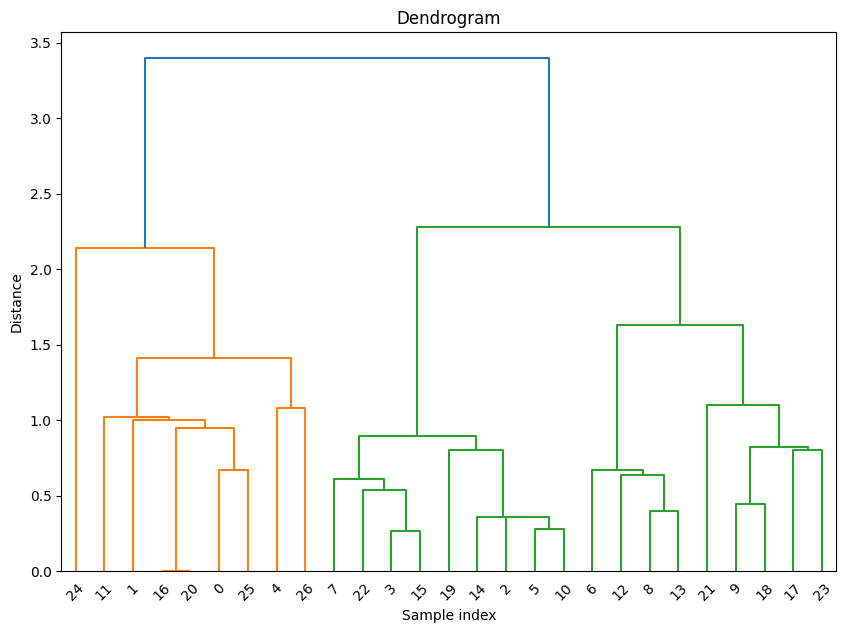

In [6]:

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(clusterModel)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [7]:
# Perform hierarchical clustering using the centroid method
clusterModel1 = linkage(dist, method='centroid')
print(clusterModel)

[[16.         20.          0.          2.        ]
 [ 3.         15.          0.26925824  2.        ]
 [ 5.         10.          0.28284271  2.        ]
 [ 2.         29.          0.36055513  3.        ]
 [14.         30.          0.36055513  4.        ]
 [ 8.         13.          0.4         2.        ]
 [ 9.         18.          0.4472136   2.        ]
 [22.         28.          0.54083269  3.        ]
 [ 7.         34.          0.60827625  4.        ]
 [12.         32.          0.64031242  3.        ]
 [ 6.         36.          0.67082039  4.        ]
 [ 0.         25.          0.67082039  2.        ]
 [19.         31.          0.8         5.        ]
 [17.         23.          0.80622577  2.        ]
 [33.         40.          0.82462113  4.        ]
 [35.         39.          0.89442719  9.        ]
 [27.         38.          0.9486833   4.        ]
 [ 1.         43.          1.          5.        ]
 [11.         44.          1.0198039   6.        ]
 [ 4.         26.          1.08

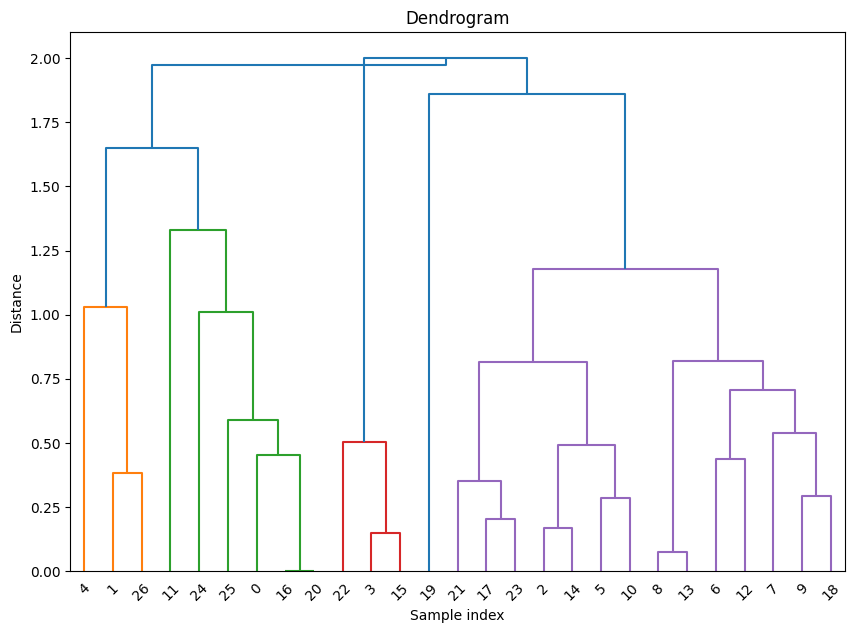

In [8]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(clusterModel1)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


1. What does linkage mean? single? linkage matrix?
2. Interpret the linkage matrix and dendrogram together- what is happening in each step in the printout of the clusterModel?
3. Change the linkage method to centroid. Plot it above, in addition to the first plot. How did your dendrogram change?
4. What does centroid mean?
5. What distance would you choose to decide the number of clusters?
6. What is one way you could use this visualization to understand more about your samples?
7. How might you label your clusters? Try to label your clusters and replot your dendrogram

#1. What does linkage mean? single? linkage matrix?

Linkage refers to the method used to calculate the distance between clusters which determines how many clusters are merged at each step. Single linkage calculates the distance between the clusters as the shortest distance between any member of one cluster to any member of the other cluster. Linkage matrix is produced during the hierarchial clustering and shows the record for the merge of clusters.

#2.Interpret the linkage matrix and dendrogram together- what is happening in each step in the printout of the clusterModel?



The lineage matrix shows a step-by-step account of the cluster fusion process. Each row tells you which clusters were merged, at what distance they were merged at, and how many data points are in the newly formed cluster. It startes with the closest pairs and continues that process until all of the data points are in a single cluster. Column 0 and 1 is the indicies of the merged clusters, column 2 is the distance at which the two clusters were merged - how similar/different the clusters were. Column 3 is the total number of original samples in the new cluster. The dendrogram visually represents that process. Vertical lines show the merge points, and the height of the vertical line represents the distance at which the cluster was merged. The horizontal lines connect the clusters being merged.

Clusters 16 and 20 merge at a distance of 0 and create a new cluster with 2 data points. Each row after indicates further merges which on the dendrogram is shown by a slightly taller vertical line connecting the clusters. As the merge progresses the distances increase indicating that the algorithim is merging clusters that are less similar. The final merge happens at a distance of 3.4 which is the highest line in the dendrogram, and indicates the highest lvel of dissimlarity in the hierarchial structure. It contails 27 samples - which is all of the data points.

#3. Change the linkage method to centroid. Plot it above, in addition to the first plot. How did your dendrogram change?

The centroid method is more balanced and the clusters are joined at a more uniform level across the dataset. The final merge happens at a distance of 2 with 18 data points showing a more meaningful cluster than the other methods of 3.4 with 27 samples. Its starts off very similar. But, the early merges occur at lower distances than the sibngle linkage and is more gradual and controlled.

#4. What does centroid mean?

The centroid is the mean position of all of the data points in a set and is the center of mass.

In the linkage method, the distance between two clusters is the distance between their centroids

#5.What distance would you choose to decide the number of clusters?

look for a large jump/gap in the linkage distances, and cut the dendrogram there as the large increase shows diminising similarities between the clusters and would be a good place to seperate the clusters. In this single linkage method the best place to cutoff would be at a height of around 2.5.

#6. What is one way you could use this visualization to understand more about your samples?

1. Identifying natural groupings and determine key dividers: To see how the samples are related to each other in terms of underlying features such as similar acidity and sugar levels which can correspond to similar taste porfiles. It can also help pinpoint wines that dont match the expected chemical profile that may indicate porblems with the fermenation/storage.
2. Can identify outliers if certain samples merged at significantly higher distances than others.

#7.How might you label your clusters? Try to label your clusters and replot your dendrogram

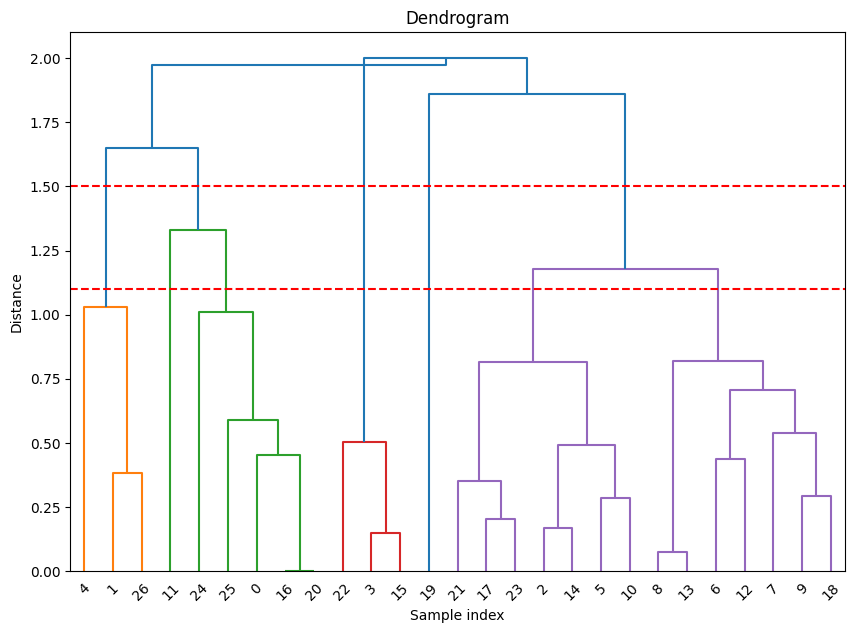

In [9]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(clusterModel1)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Draw lines at suggested cut heights
cut_heights = [1.1, 1.5]
for cut_height in cut_heights:
    plt.axhline(y=cut_height, color='r', linestyle='--')

plt.show()

I'm going to say there are 5 clusters, and cutoff at 1.5

Cluster
1              [[13.9, 7.7], [16.2, 8.5], [15.3, 7.9]]
2    [[12.2, 7.4], [12.9, 6.1], [13.1, 7.1], [13.1,...
3                [[1.45, 8.1], [1.2, 8.2], [1.9, 7.8]]
4    [[1.6, 6.4], [1.3, 6.6], [7.0, 7.5], [2.0, 7.2...
5                                         [[1.1, 5.5]]
dtype: object


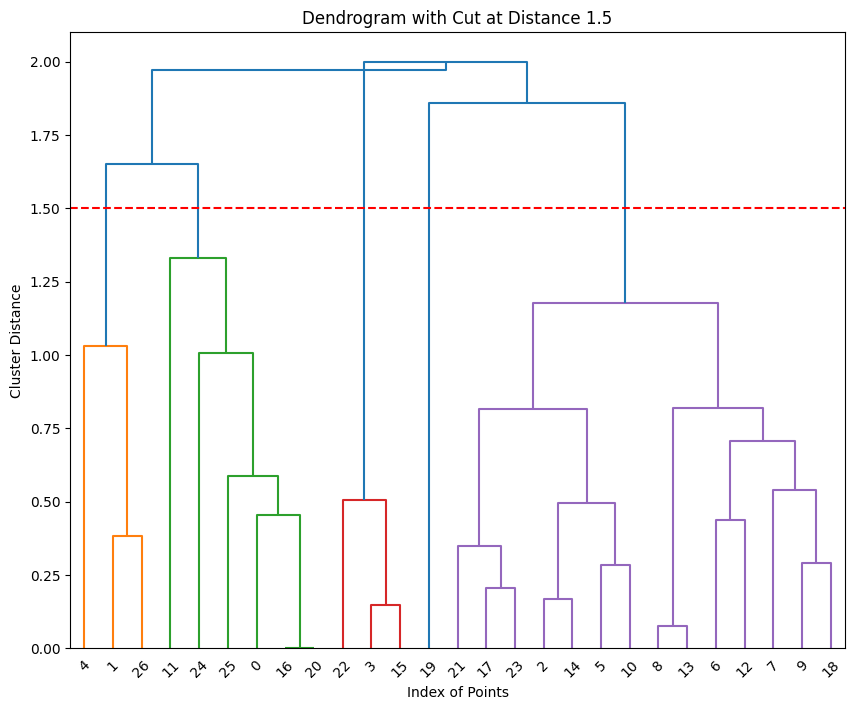

In [10]:

from scipy.cluster.hierarchy import fcluster, linkage
# Define the threshold distance
threshold_distance = 1.5

# Using fcluster to form flat clusters from the linkage matrix
clusters = fcluster(clusterModel1, threshold_distance, criterion='distance')


wine['Cluster'] = clusters
print(wine.groupby('Cluster')[['residual_sugar', 'fixed_acidity']].apply(lambda x: x.values.tolist()))


plt.figure(figsize=(10, 8))
dendrogram(clusterModel1)
plt.axhline(y=threshold_distance, color='r', linestyle='--')
plt.title('Dendrogram with Cut at Distance 1.5')
plt.xlabel('Index of Points')
plt.ylabel('Cluster Distance')
plt.show()

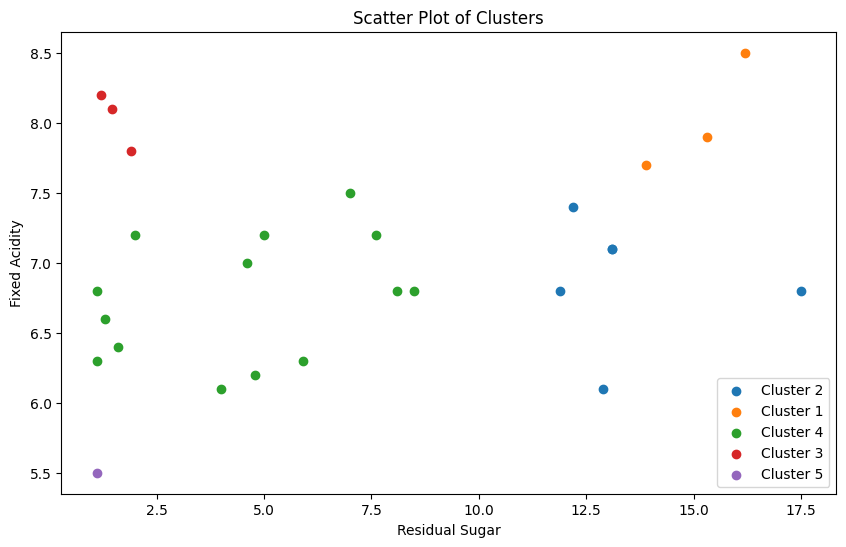

In [11]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
for cluster in wine['Cluster'].unique():
    cluster_data = wine[wine['Cluster'] == cluster]
    plt.scatter(cluster_data['residual_sugar'], cluster_data['fixed_acidity'], label=f'Cluster {cluster}')
plt.title('Scatter Plot of Clusters')
plt.xlabel('Residual Sugar')
plt.ylabel('Fixed Acidity')
plt.legend()
plt.show()


You can kind of see the dendrogram in this scatter plot. I can see which points would be grouped together if I did a smaller cutoff.

## DBSCAN
The main idea behind the DBSCAN algorithm is that connected core points and corresponding boundary points form a single cluster. An instance that is neither a core point nor a boundary point will be classified as an outlier.

The DBSCAN algorithm requires two parameters:

epsilon or ε - the radius of the spherical region
min_samples - the minimum number of samples, or instances, for a point to be a core point

Given ε and min_samples, the following steps outline the DBSCAN algorithm:

Step 1: Count the number of points within the ε-neighborhood of each instance and classify as core points instances whose ε-neighborhood has at least min_samples of points.

Step 2: Identify the core points that are within the ε-neighborhood of other core points. These connected core points form a single cluster.

Step 3: Assign points that are within the ε-neighborhood of a cluster to that cluster.

Step 4: Assign points that are not within the ε-neighborhood of a cluster as outliers.

In [12]:
from sklearn.cluster import DBSCAN
wineDB = pd.read_csv('/content/drive/MyDrive/CS 356/wine2.csv')
wineDB

,sulphates,total_sulfur_dioxide,density,citric_acid,alcohol
0,0.38,80,0.99320,0.10,9.3
1,0.46,135,0.99200,0.42,11.0
2,0.50,167,1.00100,0.40,8.7
3,0.46,122,0.99270,0.27,10.3
4,0.37,87,0.98980,0.36,12.7
5,0.37,76,0.99050,0.26,10.9
6,0.52,206,0.99400,0.26,9.8
7,0.75,138,0.99170,0.37,11.4
8,0.42,124,0.98980,0.24,12.4
9,0.95,117,0.99340,0.36,9.5


In [13]:

# Create an input matrix with selected features
X_2 = wineDB[['sulphates', 'total_sulfur_dioxide']]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_2))

# Cluster using DBSCAN with default options
dbModel2 = DBSCAN()

dbModel2 = dbModel2.fit(X)

print(dbModel2.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1]


In [14]:
wineDB = pd.read_csv('/content/drive/MyDrive/CS 356/wine2.csv')

# Create an input matrix with selected features
X_2 = wineDB[['density', 'alcohol']]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_2))

# Cluster using DBSCAN with default options
dbModel = DBSCAN()

dbModel = dbModel.fit(X)
print(dbModel.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1]


8. What do the -1's all mean (assuming for the last two input matrices you got all -1's)?
9. How can you fix this? (hint try an eps of .69 and min_samples=3) What does this mean?
10. Plot one of your results below.

#8. What do the -1's all mean (assuming for the last two input matrices you got all -1's)?

A label of -1 represesnts a noise point which are points that don't belong to any cluster according to the set epsilon (max distances between 2 samples to be considered neigbours) and min_samples (number of samples in a neigbourhood for a point to be considered as a core point). All -1s means that the eps is either too small or min_samples is too high so no clusters can form under the given parameters.

#9.How can you fix this? (hint try an eps of .69 and min_samples=3) What does this mean?

In [15]:

# Create an input matrix with selected features
X_2 = wineDB[['sulphates', 'total_sulfur_dioxide']]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_2))

# Cluster using DBSCAN with default options
dbModel2 = DBSCAN(eps=0.69, min_samples=3)

dbModel2 = dbModel2.fit(X_scaled)

print(dbModel2.labels_)

[ 0  0  0  0  0  0 -1 -1  0 -1 -1  0  0 -1  0  0  0  0  0  0 -1 -1  0]


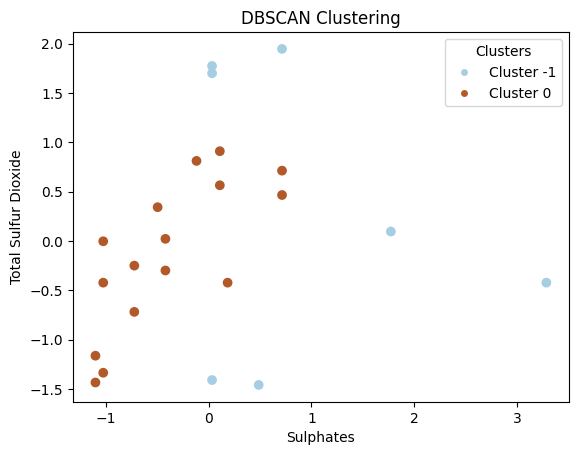

In [16]:
import numpy as np
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired', label=np.unique(y_pred))
    plt.title("DBSCAN")
    # Generate a custom legend
    unique_labels = np.unique(y_pred)
    colors = [plt.cm.Paired(each) for each in np.linspace(0, 1, len(unique_labels))]
    custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i),
                                markerfacecolor=color, markersize=6) for i, color in zip(unique_labels, colors)]
    plt.legend(handles=custom_legend, title="Clusters")

    # Add titles and labels (optional)
    plt.title("DBSCAN Clustering")
    plt.xlabel("Sulphates")
    plt.ylabel("Total Sulfur Dioxide")

dbscan(X_2, 0.69, 3)

In [19]:
wineDB = pd.read_csv('/content/drive/MyDrive/CS 356/wine2.csv')

# Create an input matrix with selected features
X_2 = wineDB[['density', 'alcohol']]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_2))

# Cluster using DBSCAN with default options
dbModel = DBSCAN(eps=0.4, min_samples=2)

dbModel = dbModel.fit(X_scaled)
print(dbModel.labels_)

[ 0  1 -1  2  3  1  0  1  3  0  1  0  1  4  0  0  5  0  2  1 -1  5  4]


In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.model_selection import ParameterGrid# Finding the best 'eps' and 'min_samples'
# Define a range of values for eps and min_samples
param_grid = {
    'eps': np.arange(0.1, 11.0, 0.1).tolist(),  # Creates a list of floats from 1.0 to 10.0 with a step of 0.1
    'min_samples': list(range(2, 51))  # Creates a list of integers from 1 to 50
}
# Initialize variables to store best parameters and best silhouette score
best_params = None
best_score = -1

# Iterate over all parameter combinations
for params in ParameterGrid(param_grid):
    # Fit DBSCAN with current parameters
    db = DBSCAN(**params).fit(X_scaled)

    # Compute silhouette score
    labels = db.labels_
    if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(X_scaled, labels)
    else:
        score = -1  # Assign a low score if only one cluster is found

    # Update best parameters and best score if current score is better
    if score > best_score:
        best_score = score
        best_params = params

# Print the best parameters and corresponding silhouette score
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'eps': 0.4, 'min_samples': 2}
Best silhouette score: 0.5237920390822122


In [21]:
dbModel.labels_
X_2['cluster_db'] = dbModel.labels_
X_2.sort_values('cluster_db')

<ipython-input-21-e7324f687a96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2['cluster_db'] = dbModel.labels_


,density,alcohol,cluster_db
20,0.99610,8.9,-1
2,1.00100,8.7,-1
0,0.99320,9.3,0
17,0.99300,9.7,0
15,0.99270,9.4,0
14,0.99390,9.9,0
9,0.99340,9.5,0
11,0.99280,9.8,0
6,0.99400,9.8,0
10,0.99085,11.1,1


#9. Plot one of your results below.

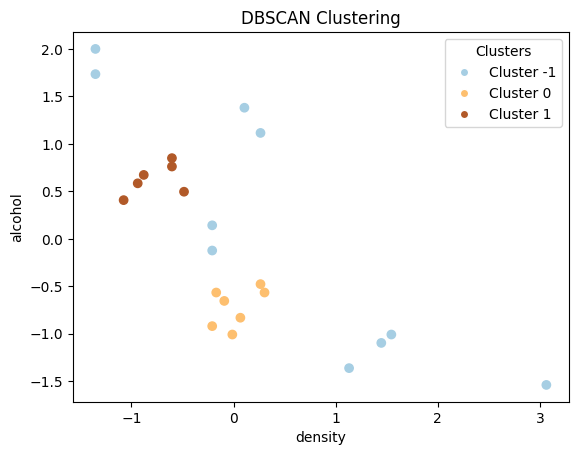

In [29]:

import numpy as np
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired', label=np.unique(y_pred))
    plt.title("DBSCAN")
    # Generate a custom legend
    unique_labels = np.unique(y_pred)
    colors = [plt.cm.Paired(each) for each in np.linspace(0, 1, len(unique_labels))]
    custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i),
                                markerfacecolor=color, markersize=6) for i, color in zip(unique_labels, colors)]
    plt.legend(handles=custom_legend, title="Clusters")

    # Add titles and labels (optional)
    plt.title("DBSCAN Clustering")
    plt.xlabel("density")
    plt.ylabel("alcohol")

dbscan(X_2, 0.69, 3)

#try clustering with other values.

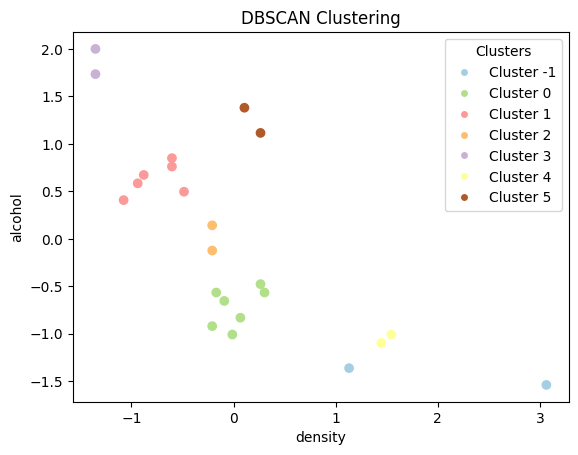

In [26]:
dbscan(X_2, 0.4, 2)

In [25]:
!pip install tpot

In [ ]:
!pip install --upgrade --force-reinstall scikit-learn tpot


In [30]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Define TPOT search parameters
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)

# Fit TPOT to find the best pipeline
tpot.fit(X_train, y_train)

# Evaluate the best pipeline on the test set
accuracy = tpot.score(X_test, y_test)
print("Test set accuracy:", accuracy)


# Export the final pipeline code
tpot.export('tpot_iris_pipeline.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9833333333333334

Generation 2 - Current best internal CV score: 0.9833333333333334

Generation 3 - Current best internal CV score: 0.9833333333333334

Generation 4 - Current best internal CV score: 0.9833333333333334

Generation 5 - Current best internal CV score: 0.9833333333333334

Best pipeline: LogisticRegression(MultinomialNB(input_matrix, alpha=10.0, fit_prior=False), C=25.0, dual=False, penalty=l2)
Test set accuracy: 1.0


In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.base import TransformerMixin, BaseEstimator

# Load the Iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Since naive Bayes requires non-negative inputs, ensure all features are non-negative:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a custom transformer to use NB predictions as features
class NBTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, alpha=10.0, fit_prior=False):
        self.nb = MultinomialNB(alpha=alpha, fit_prior=fit_prior)

    def fit(self, X, y):
        self.nb.fit(X, y)
        return self

    def transform(self, X):
        # Return the probability estimates for each class
        return self.nb.predict_proba(X)

# Set up the pipeline
nb_transformer = NBTransformer(alpha=10.0, fit_prior=False)
logreg = LogisticRegression(C=25.0, dual=False, penalty='l2', random_state=42)

pipeline = make_pipeline(nb_transformer, logreg)

# Fit the pipeline
pipeline.fit(X_train_scaled, y_train)

# Evaluate the pipeline
accuracy = pipeline.score(X_test_scaled, y_test)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9333333333333333


11. Go to http://epistasislab.github.io/tpot/ , read about this tool
12. What is TPOT good for? What is it not good for?
13. Which algorithms does TPOT check?
14. In the code above, what do the parameters mean? # Do NOT be so simplistic with your metrics, this is a code sample above.
15. In a new notebook, do:
    -- DBSCAN on aspect of your data and visualize
    - TPOT on an aspect of your final project, and implement its suggestion plus report on your results
    - Dendrogram that is readable and legible (you can take representative samples from your data)
    - Spelling counts from now on! (too many misspelled words in your notebooks)

#11. Go to http://epistasislab.github.io/tpot/ , read about this tool

#12.What is TPOT good for? What is it not good for?

TPOT is good for automating the process of slecting ML algorithims and their parameters. It useful for when you dont know what model will perform best for the given problem. However, it can overfit the model and it lacks domain knowledge so that cant be integrated. For simple problems, it would probably be better to use the known solutions for effeciency.  

#13. Which algorithms does TPOT check?

For classifiers: GaussianNB, BernoulliNB, MultinomialNB, DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, KNeighborsClassifier, LinearSVC, LogisticRegression, XGBClassifier, SGDClassifier, MLPClassifier
Regressors: ElasticNetCV, ExtraTreesRegressor,GradientBoostingRegressor, AdaBoostRegressor,DecisionTreeRegressor,KNeighborsRegressor,LassoLarsCV, LinearSVR, RandomForestRegressor,RidgeCV,XGBRegressor, SGDRegressor
Preprocesser: Binarizer,  FastICA, FeatureAgglomeration,MaxAbsScaler, MinMaxScaler, Nystroem, PCA, PolynomialFeatures, RBFSampler, RobustScaler, StandardScaler, ZeroCount, OneHotEncoder
Selectors: SelectFwe, SelectPercentile, VarianceThreshold, RFE,SelectFromModel


#14.In the code above, what do the parameters mean? # Do NOT be so simplistic with your metrics, this is a code sample above

In the code above:

TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)
- Generations: the number of iterations to run the pipeline optimization process
- population_size: the number of individual piplines in each generation
- verbosity: the amount of info the TPOT prints out - 2 means it prints all the info and the progress bar during fitting. (levels ranfe from 0 (silent) to 3(very detailed)
- random_state: stes a seed for the random number generator to make the output reproducable

tpot.fit(X_train, y_train)
- Fits TPOT to the training data
- initialization (preprocessing and ML) -> Evaluation -> selection -> crossover -> mutation -> new generation -> termination -> best pipeline selection

tpot.score(X_test, y_test)
- evaluates the performance of the best model found on the test dataset
- The default is the accuracy of the model

tpot.export('tpot_iris_pipeline.py')
- Exports the python code for the best pipline found by TPOT



#15. In a new notebook, do: -- DBSCAN on aspect of your data and visualize TPOT on an aspect of your final project, and implement its suggestion plus report on your results Dendrogram that is readable and legible (you can take representative samples from your data) Spelling counts from now on! (too many misspelled words in your notebooks)
